## Predicting US Covid Cases based on historical CDC reported flu data

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

### getting historical flu data

In [2]:
flu_dir = "../../cdc-fludata/us_national/"

In [3]:
flu_dictionary = {}

for year in range(1997, 2019):
    filepath = "usflu_"
    year_string = str(year) + "-" + str(year + 1)
    filepath = flu_dir + filepath + year_string + ".csv"
    temp_df = pd.read_csv(filepath)
    flu_dictionary[year] = temp_df

In [13]:
flu_dictionary[2003]

,YEAR,WEEK,TOTAL SPECIMENS,A (H1),A (Unable to Subtype),A (H3),A (2009 H1N1),A (Subtyping not Performed),B,H3N2v,PERCENT POSITIVE
0,2003,40,1430,0,0,2,0,19,1,0,1.538460
1,2003,41,1682,0,0,3,0,74,0,0,4.577880
2,2003,42,2176,0,0,17,0,235,1,0,11.626800
3,2003,43,2568,0,0,56,0,398,4,0,17.834900
4,2003,44,2753,0,0,100,0,435,0,0,19.433300
5,2003,45,3553,1,0,273,0,585,3,0,24.261200
6,2003,46,4595,0,0,381,0,908,2,0,28.095800
7,2003,47,5942,0,0,585,0,1375,8,0,33.120200
8,2003,48,6479,0,0,489,0,1752,10,0,34.743000
9,2003,49,9598,0,0,977,0,2260,32,0,34.059200


### combining flu data into one chronological series of total cases

In [26]:
# getting total cases and putting them in a series by week
flu_series_dict = {} 

for year in flu_dictionary:
    temp_df = flu_dictionary[year]
    temp_df = temp_df.set_index("WEEK")
    abridged_df = temp_df.iloc[:, 2:]
    
    try:
        abridged_df = abridged_df.drop(columns="PERCENT POSITIVE")
    except:
        pass
    
    total_cases_series = abridged_df.sum(axis=1)
    flu_series_dict[year] = total_cases_series
    

In [32]:
all_cases_series = pd.Series(dtype="int64")

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    all_cases_series = all_cases_series.append(temp_series, ignore_index=True)

In [33]:
all_cases_series

0         0
1        11
2        17
3         7
4        10
       ... 
1143     87
1144    110
1145    143
1146    147
1147    152
Length: 1148, dtype: int64

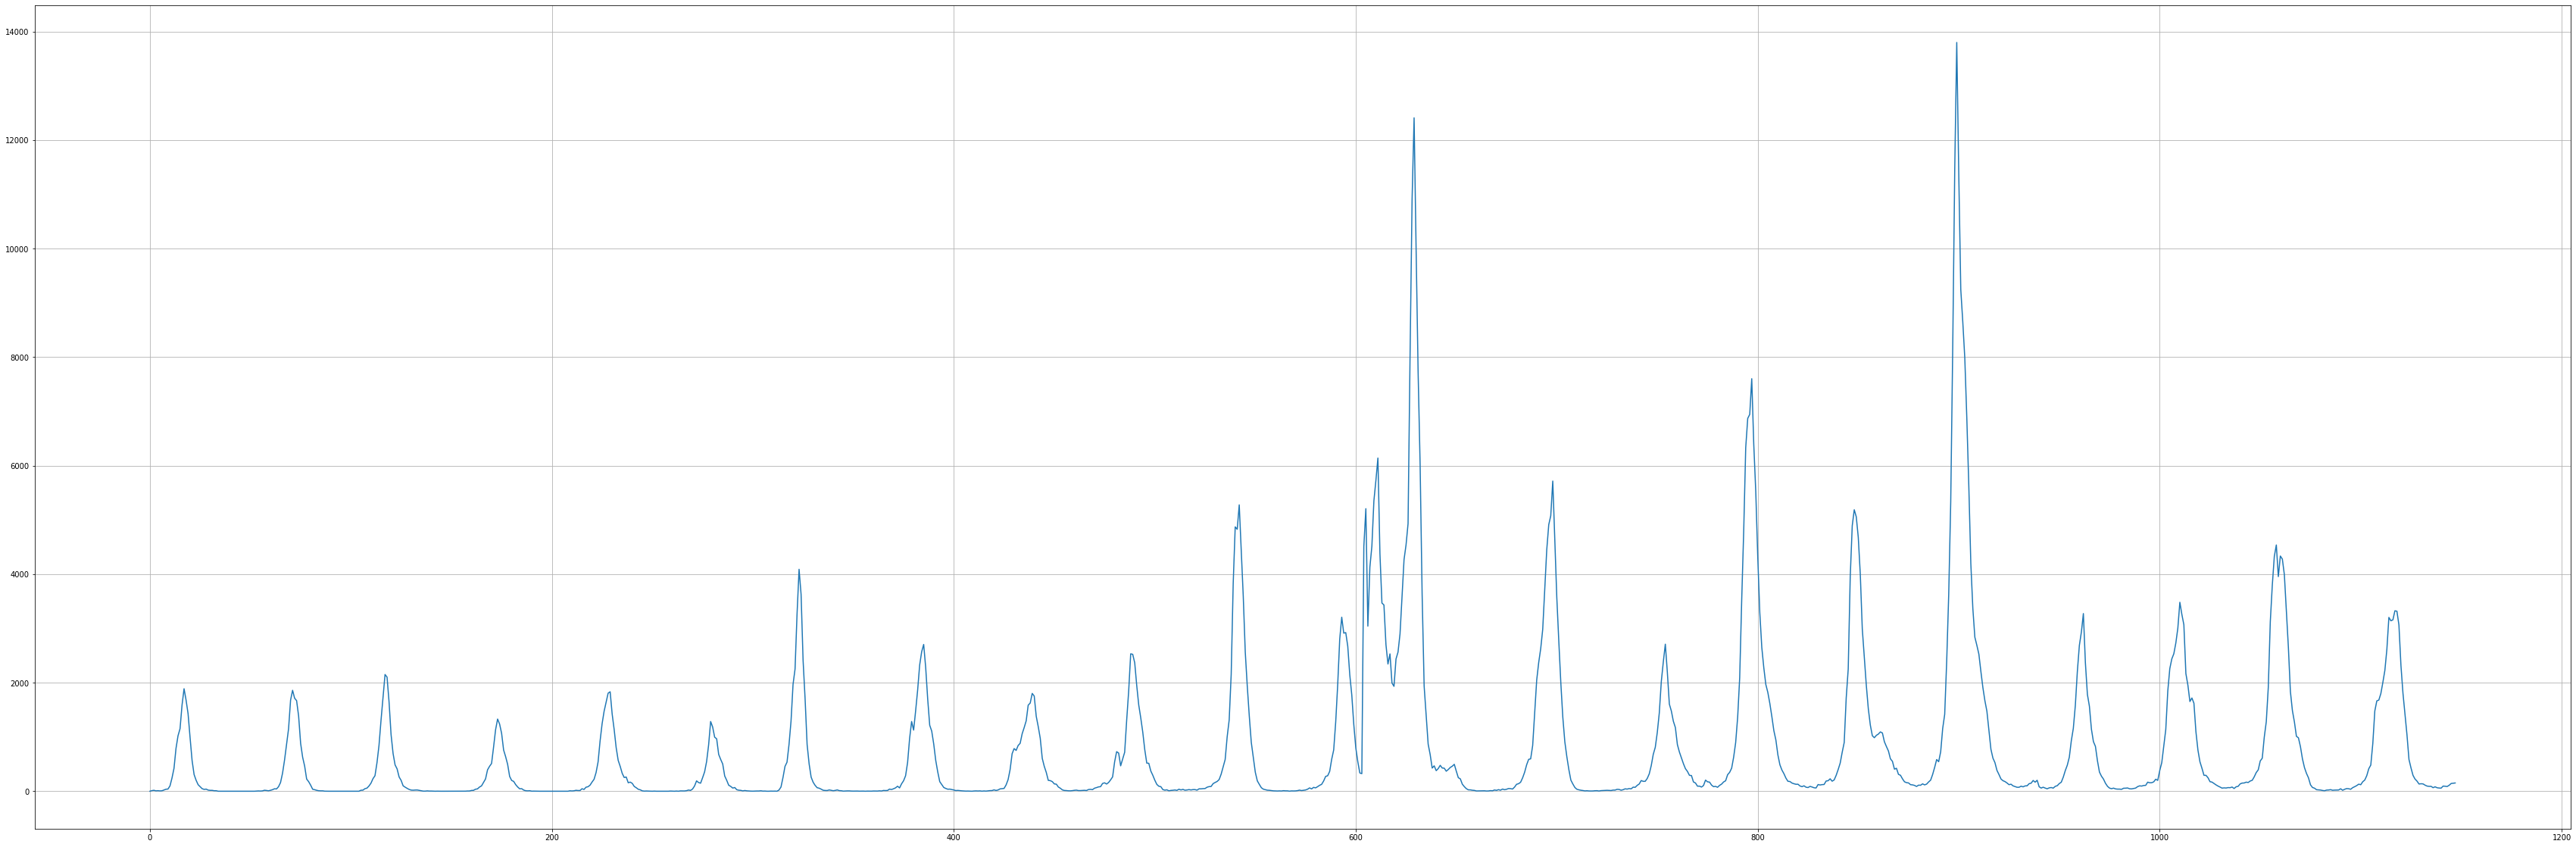

In [39]:
all_cases_series.plot(grid=True, figsize=(60,20))

## Now, making a normalized series between 0, 1

In [47]:
norm_flu_series_dict = {}

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    temp_list = preprocessing.minmax_scale(temp_series)
    temp_series = pd.Series(temp_list)
    norm_flu_series_dict[year] = temp_series

In [48]:
all_cases_norm_series = pd.Series(dtype="int64")

for year in norm_flu_series_dict:
    temp_series = norm_flu_series_dict[year]
    all_cases_norm_series = all_cases_norm_series.append(temp_series, ignore_index=True)

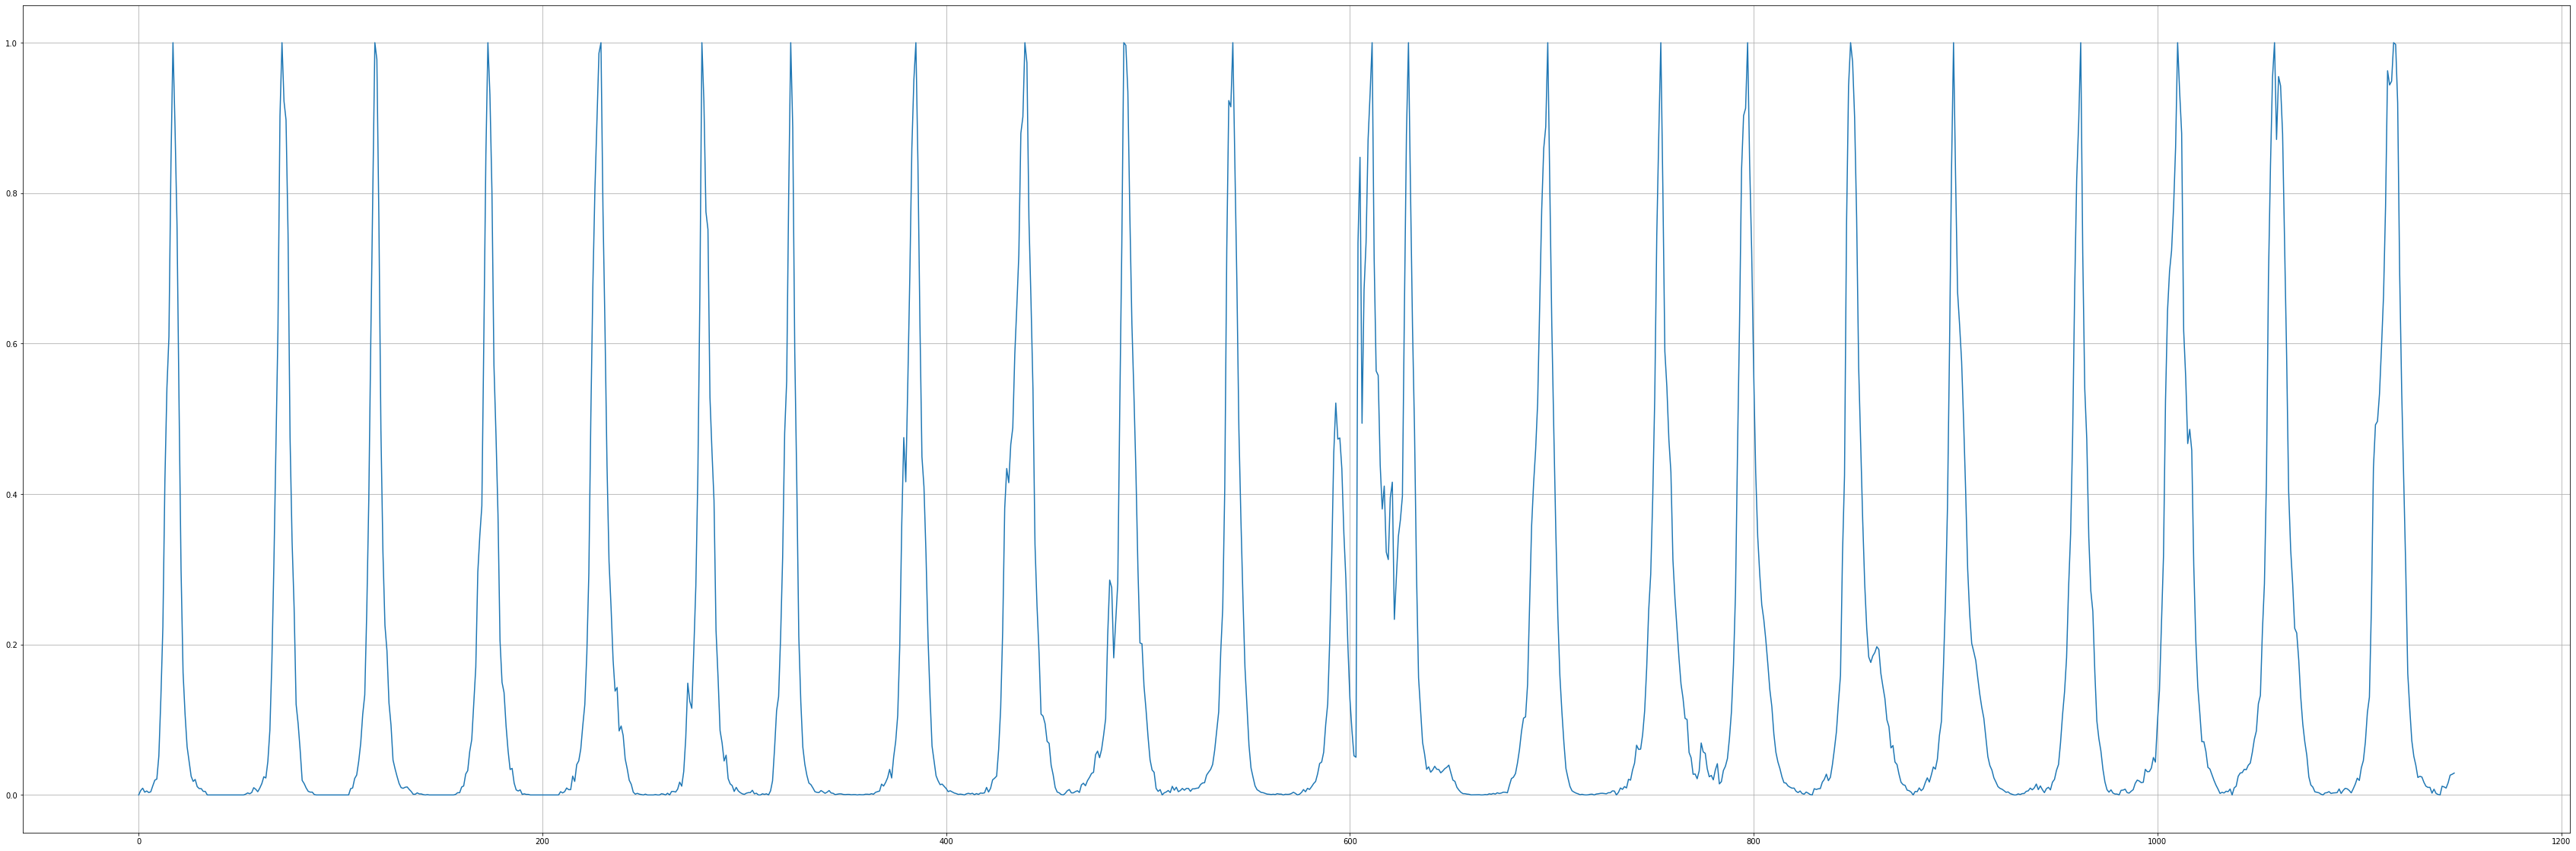

In [50]:
all_cases_norm_series.plot(grid=True, figsize=(60,20))